# A Visual History of Nobel Prize Winners

## Context

Between 1901 and 2016, the Nobel Prizes and the Prize in Economic Sciences were awarded 579 times to 911 people and organizations. The Nobel Prize is an international award administered by the Nobel Foundation in Stockholm, Sweden, and based on the fortune of Alfred Nobel, Swedish inventor and entrepreneur. In 1968, Sveriges Riksbank established The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel, founder of the Nobel Prize. Each Prize consists of a medal, a personal diploma, and a cash award.

A person or organization awarded the Nobel Prize is called Nobel Laureate. The word "laureate" refers to being signified by the laurel wreath. In ancient Greece, laurel wreaths were awarded to victors as a sign of honor.

## Project Tasks

    1. Who gets the Nobel Prize? 
    2. USA dominance
    3. The first woman to win the Nobel Prize
    4. Repeat laureates
    5. How old are you when you get the prize?
    6. Oldest and youngest winners

## The Data

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set_context('notebook')


In [213]:
data = pd.read_csv('archive.csv')
data.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [214]:
print('The data base consists of {} rows and {} columns'.format(data.shape[0], data.shape[1]))   

The data base consists of 969 rows and 18 columns


### Task 1 - Who gets the Nobel Prize? 
- Lets try to characterise the type of person who wins a Nobel Prize

#### Male vs Female

In [215]:
male_female_ratio = data['Sex'].value_counts()
print('Since 1901 there were {} male winners and {} female Noble prize winners'.format(male_female_ratio[0],male_female_ratio[1]))

Since 1901 there were 893 male winners and 50 female Noble prize winners


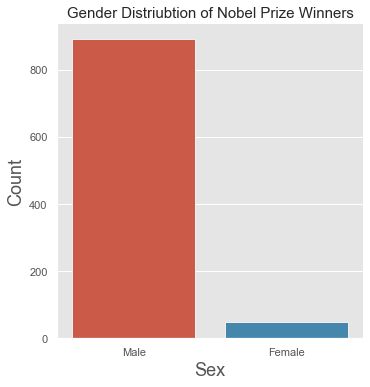

In [216]:
g = sns.catplot(data = data,x = 'Sex', kind = 'count')
plt.xlabel('Sex', size = 18)
plt.ylabel('Count', size = 18)
plt.title('Gender Distriubtion of Nobel Prize Winners', size = 15)
plt.show()

In [217]:
male_female_proporation = male_female_ratio[0] / male_female_ratio[1]
male_female_proporation

17.86

#### Notes
- So __men won__ the Nobel Prize almost __18 times as much as women did__.
- Since women did not have access to education as much as men did at the time the Nobel Prize was first established __this is to be expected__.
- __Lets see if the gap between men and women has(hopefully) diminished over the years__

In [218]:
male_vs_year = data[data['Sex'] == 'Male']['Year'].reset_index()
female_vs_year = data[data['Sex'] == 'Female']['Year'].reset_index()

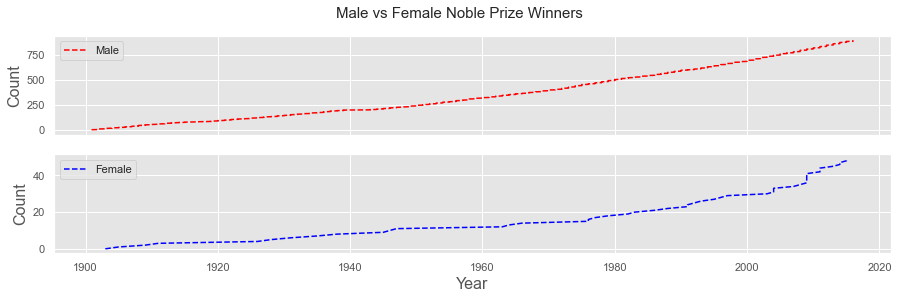

In [219]:
fig, ax = plt.subplots(2,1, sharex = True, figsize = [15,4])

ax[0].plot(male_vs_year['Year'],  male_vs_year.index, label = 'Male', c = 'r', linestyle = '--')
ax[0].set_ylabel('Count', size = 16)
ax[0].legend()

ax[1].plot(female_vs_year['Year'],  female_vs_year.index, label = 'Female', c = 'b', linestyle = '--' )
ax[1].set_xlabel('Year', size = 16)
ax[1].set_ylabel('Count', size = 16)
ax[1].legend()

fig.suptitle('Male vs Female Noble Prize Winners', size = 15)
plt.show()

- As we can see the amount of male nobel prize winners has been same over the years.
- in the last 30 years theres been more and more female nobel prize winners.
- Lets zoom in on those last 30 years

In [220]:
last_30_df = data[data['Year'] > 1990]
male_vs_year_last_30 = last_30_df[last_30_df['Sex'] == 'Male']['Year'].reset_index()
female_vs_year_last_30 = last_30_df[last_30_df['Sex'] == 'Female']['Year'].reset_index()

In [221]:
last_30_male_female_ratio = last_30_df['Sex'].value_counts()
print('Since 1990 there were {} male winners and {} female Noble prize winners'.format(last_30_male_female_ratio[0],last_30_male_female_ratio[1]))

Since 1990 there were 297 male winners and 27 female Noble prize winners


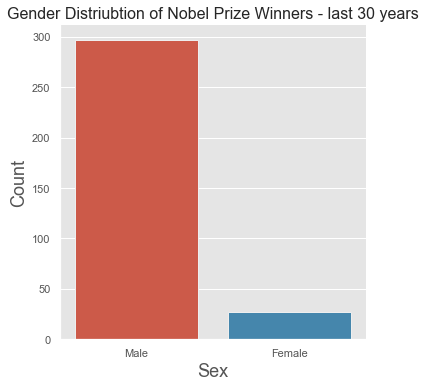

In [222]:
g = sns.catplot(data = last_30_df,x = 'Sex', kind = 'count')
plt.xlabel('Sex', size = 18)
plt.ylabel('Count', size = 18)
plt.title('Gender Distriubtion of Nobel Prize Winners - last 30 years', size = 16)
plt.show()

In [223]:
male_female_proporation = last_30_male_female_ratio[0] / last_30_male_female_ratio[1]
male_female_proporation

11.0

- So in the last 30 years the proportions of male vs female nobel prize winners is 11 compared to 18 for last century.
- As expected, the gap between male vs female is getting smaller over the years


### Country of Origin

In [224]:
winners_by_country = data['Birth Country'].value_counts().head(20)
winners_by_country

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Switzerland                  17
Austria                      15
Norway                       13
China                        12
Australia                    11
Denmark                      11
Germany (Poland)             10
South Africa                  9
Scotland                      9
Belgium                       9
Name: Birth Country, dtype: int64

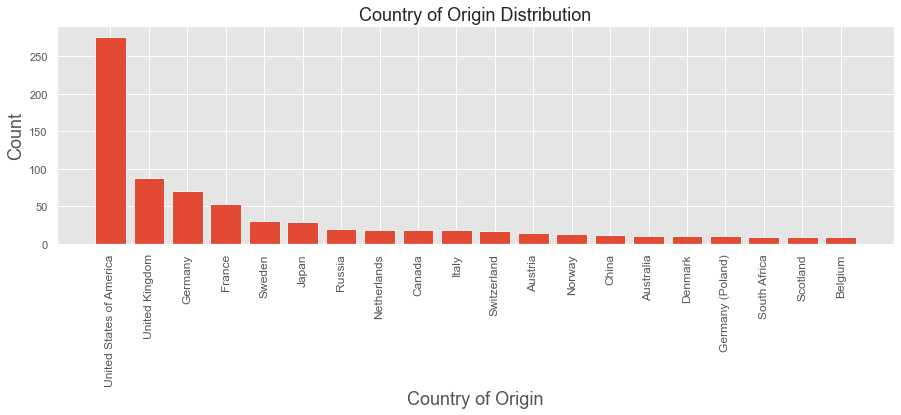

In [225]:
fig, ax = plt.subplots(figsize = [15,4])
ax.bar(x = winners_by_country.index, height = winners_by_country)
plt.xticks(rotation = 90, size = 12)
plt.xlabel('Country of Origin', size = 18)
plt.ylabel('Count', size = 18)
plt.title('Country of Origin Distribution', size = 18)
plt.show()

The majority of Nobel prize winners are either european(most likely from: Uk, France or Germany) or from the US.

### Category

In [226]:
winners_by_category = data['Category'].value_counts().reset_index()
winners_by_category

,index,Category
0,Medicine,227
1,Physics,222
2,Chemistry,194
3,Peace,130
4,Literature,113
5,Economics,83


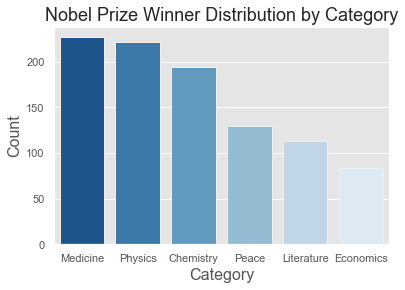

In [227]:
sns.barplot(data = winners_by_category, x = 'index', y= winners_by_category.Category, palette='Blues_r')
plt.xlabel('Category', size = 16)
plt.ylabel('Count', size = 16)
plt.title('Nobel Prize Winner Distribution by Category', size = 18)
plt.show()

- It turns out that the most of the Nobel prizes are for the categories: Medicine, Physics and Chemistry. 

#### Summary
From this quick exploration, it turns out that the __average Noble prize winner__ is most probably a __US/European__ __Male__ that has studied __Medicine, Physics or Chemistry__.

### Task 2 - USA dominance
- As expected, USA is the dominant country when it comes to Noble prize winners.
- Lets check When did the USA start to dominate the Nobel Prize charts?

In [228]:
us_winners_df = pd.DataFrame()
data['US_Winners'] = data['Birth Country'] == 'United States of America'
data['Decade'] = (np.floor(data['Year'] / 10)*10).astype('int')
prop_usa_winners = (data.groupby('Decade', as_index=False)['US_Winners'].mean()) 
prop_usa_winners

,Decade,US_Winners
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


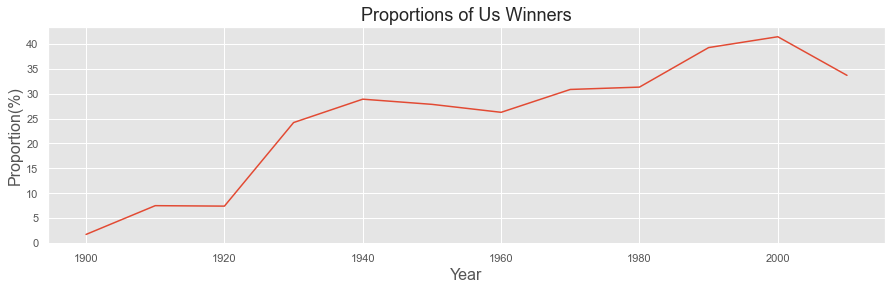

In [229]:
plt.subplots(figsize = [15,4])
plt.plot(prop_usa_winners.Decade, prop_usa_winners.US_Winners * 100)
plt.xlabel('Year', size = 16)
plt.ylabel('Proportion(%)', size = 16)
plt.title('Proportions of Us Winners', size = 18)
plt.show()

- It appears that at around the years 1920-1930 the US has started to become one of the dominant countries when it comes to noble prizes

### Task 3 - The first woman to win the Nobel Prize

In [230]:
female_winners_df = data[data['Sex'] == 'Female'].sort_values('Year',ascending = True)

In [231]:
print('\033[4m\033[1m Report - First Female Noble Prize Winner \033[0m\n\n{}'.format(female_winners_df.iloc[0,0:12]))

 Report - First Female Noble Prize Winner 

Year                                                          1903
Category                                                   Physics
Prize                              The Nobel Prize in Physics 1903
Motivation       "in recognition of the extraordinary services ...
Prize Share                                                    1/4
Laureate ID                                                      6
Laureate Type                                           Individual
Full Name                              Marie Curie, née Sklodowska
Birth Date                                              1867-11-07
Birth City                                                  Warsaw
Birth Country                              Russian Empire (Poland)
Sex                                                         Female
Name: 19, dtype: object


- The first Female Noble Prize winner was Marie Curie in 1903 for her work in Physics.

### Task 4 - Repeat laureates
- Lets find those extraordinary people who have won the noble prize __more than once__

In [232]:
import pandasql as ps

In [233]:
def sql(query):
    return ps.sqldf(query)

In [234]:
query = '''
SELECT *
FROM data
GROUP BY "Laureate ID"
HAVING COUNT("Laureate ID") > 1'''

repeat_laureates_df = sql(query)
repeat_laureates_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,US_Winners,Decade
0,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,None,None,None,1934-07-04,Sallanches,France,0,1900
1,1949,Physics,The Nobel Prize in Physics 1949,"""for his prediction of the existence of mesons...",1/1,54,Individual,Hideki Yukawa,1907-01-23,Tokyo,Japan,Male,Kyoto Imperial University,Kyoto,Japan,1981-09-08,Kyoto,Japan,0,1940
2,1954,Physics,The Nobel Prize in Physics 1954,"""for the coincidence method and his discoverie...",1/2,62,Individual,Walther Bothe,1891-01-08,Oranienburg,Germany,Male,University of Heidelberg,Heidelberg,Federal Republic of Germany,1957-02-08,Heidelberg,West Germany (Germany),0,1950
3,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,1,1950
4,1958,Physics,The Nobel Prize in Physics 1958,"""for the discovery and the interpretation of t...",1/3,71,Individual,Igor Yevgenyevich Tamm,1895-07-08,Vladivostok,Russia,Male,University of Moscow,Moscow,Union of Soviet Socialist Republics,1971-04-12,Moscow,Union of Soviet Socialist Republics (Russia),0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2013,Chemistry,The Nobel Prize in Chemistry 2013,"""for the development of multiscale models for ...",1/3,889,Individual,Martin Karplus,1930-03-15,Vienna,Austria,Male,Université de Strasbourg,Strasbourg,France,None,None,None,0,2010
59,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,906,Individual,Isamu Akasaki,1929-01-30,Chiran,Japan,Male,Meijo University,Nagoya,Japan,None,None,None,0,2010
60,2014,Chemistry,The Nobel Prize in Chemistry 2014,"""for the development of super-resolved fluores...",1/3,910,Individual,Stefan W. Hell,1962-12-23,Arad,Romania,Male,Max Planck Institute for Biophysical Chemistry,Göttingen,Germany,None,None,None,0,2010
61,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,Sweden,Male,Francis Crick Institute,Hertfordshire,United Kingdom,None,None,None,0,2010


### Task 5 - How old are you when you get the prize?

- Lets check what is the average age of nobel prize winners

In [235]:
query = '''
SELECT ("Year" - SUBSTR("Birth Date", 0, 5)) as "Age"
FROM data
'''
df = sql(query)

In [236]:
data['Age'] = df['Age']

In [237]:
avg_age = round(data['Age'].mean(),2)
print('The Average Age of a Noble Prize Winner is: {}'.format(avg_age)) 

The Average Age of a Noble Prize Winner is: 59.49


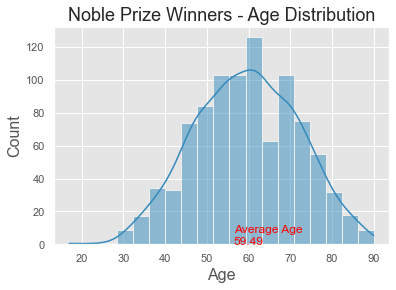

In [238]:
sns.histplot(data['Age'], kde = True)
plt.xlabel('Age', size = 16)
plt.ylabel('Count', size = 16)
plt.title('Noble Prize Winners - Age Distribution', size = 18)
plt.text(avg_age-3, 0,'Average Age\n{}'.format(avg_age), c = 'r')
plt.show()

- Lets also check the age distribution over the year.

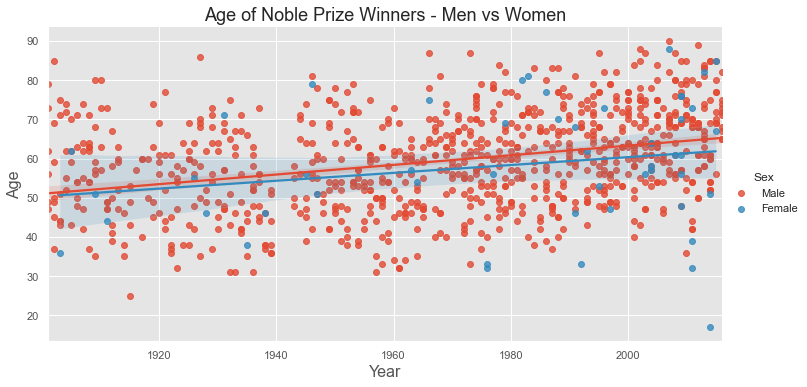

In [239]:
g = sns.lmplot(data = data, x = 'Year', y = 'Age', hue = 'Sex', aspect = 2)
g = g.set_axis_labels('Year', 'Age', size = 16)
plt.title('Age of Noble Prize Winners - Men vs Women', size = 18)
plt.show()

- Same for Category

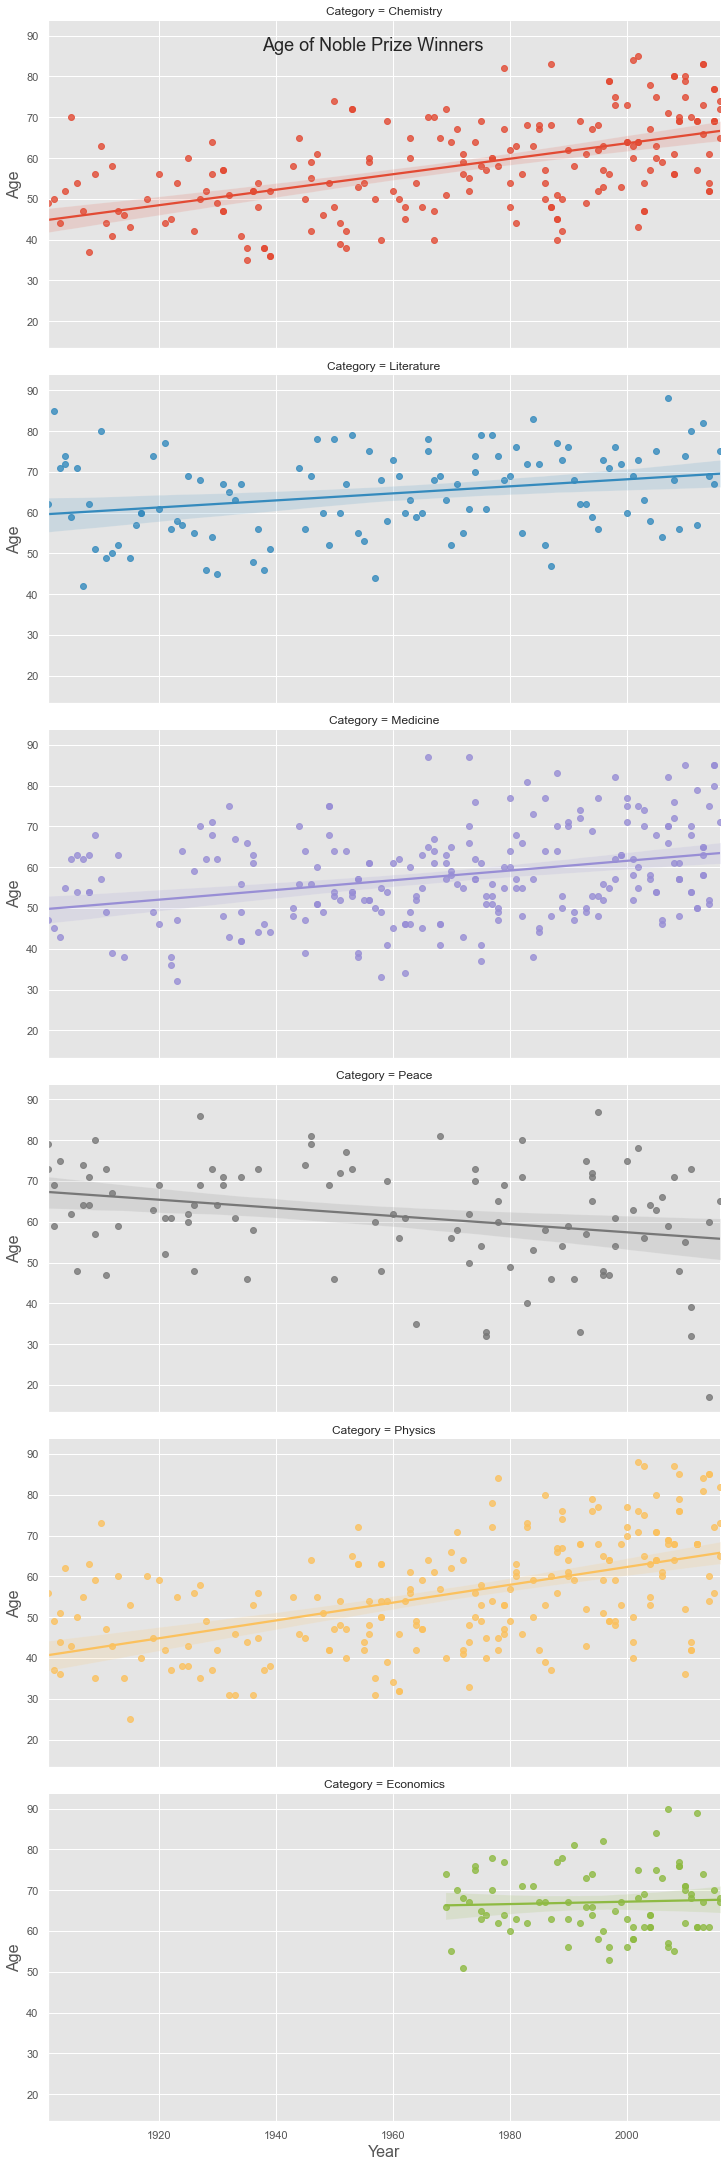

In [240]:
g = sns.lmplot(data = data, x = 'Year', y = 'Age', row = 'Category', aspect = 2,hue = 'Category' )
g = g.set_axis_labels('Year', 'Age', size = 16)
g.fig.suptitle('Age of Noble Prize Winners', size = 18)
plt.show()

### Task 6 - Oldest and youngest winners

#### Oldest

In [241]:
# The oldest winner of a Nobel Prize as of 2016
oldest_winner = data.nlargest(1, 'Age')
oldest_winner

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,US_Winners,Decade,Age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,90.0


In [242]:
oldest_winner_name = data.nlargest(1, 'Age').loc[:,'Full Name'].values[0]
oldest_winner_age = data.nlargest(1, 'Age').loc[:,'Age'].values[0]
print(f'The Oldest Nobel Prize Winner is {oldest_winner_name!r} at the age of {oldest_winner_age!r}')

The Oldest Nobel Prize Winner is 'Leonid Hurwicz' at the age of 90.0


#### Youngest

In [243]:
# The youngest winner of a Nobel Prize as of 2016
data.nsmallest(1, 'Age')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,US_Winners,Decade,Age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,17.0


In [244]:
youngest_winner_name = data.nsmallest(1, 'Age').loc[:,'Full Name'].values[0]
youngest_winner_age = data.nsmallest(1, 'Age').loc[:,'Age'].values[0]
print(f'The Youngest Nobel Prize Winner is {youngest_winner_name!r} at the age of {youngest_winner_age!r}')

The Youngest Nobel Prize Winner is 'Malala Yousafzai' at the age of 17.0
